In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_json('logins.json')

In [15]:
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [16]:
df['count'] = 1
df.index = df['login_time']
df.drop('login_time',axis=1,inplace=True)
df.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<AxesSubplot:xlabel='login_time'>

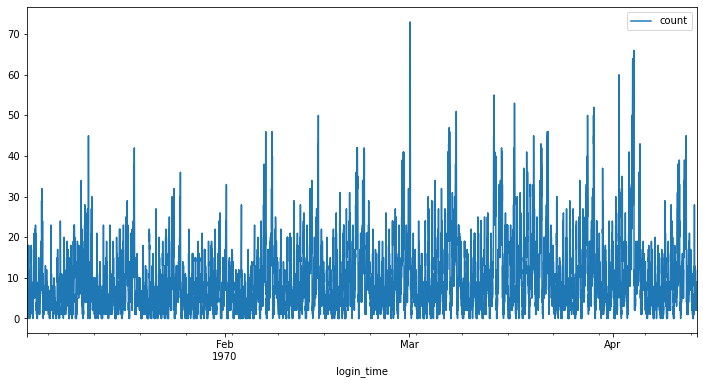

In [17]:
df_count = df.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

It seems like, over 4 months, the average increases. 

In [18]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


The average number of logins per 15 minutes is 7.

In [19]:
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.weekday)
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,3
1970-01-01 20:15:00,6,1,3
1970-01-01 20:30:00,9,1,3
1970-01-01 20:45:00,7,1,3
1970-01-01 21:00:00,1,1,3


In [20]:

spike = np.quantile(df_count,0.99)
df_spike = df_count[df_count['count'] >= spike]
month_days = []
weekdays = []
for date in df_spike.index:
    month_days.append(date.day)
    weekdays.append(date.weekday())
    
df_spike_days = pd.DataFrame(month_days,columns=['day'],index=range(len(month_days)))
df_spike_weekdays = pd.DataFrame(weekdays,columns=['weekday'],index=range(len(weekdays)))

In [21]:
df_spike_days.day.value_counts()[0:10]


21    25
4     24
15    18
22    18
28    17
7     15
8     15
29    14
14    14
3     13
Name: day, dtype: int64

In [22]:
df_spike_weekdays.weekday.value_counts()


5    104
6    103
4     48
3     15
2      7
1      7
0      2
Name: weekday, dtype: int64

User logins spike overwhelmingly on the weekends, which makes sense since many people use ride share apps to go to parties or bars, which are frequented mostly on the weekends.

<AxesSubplot:xlabel='login_time'>

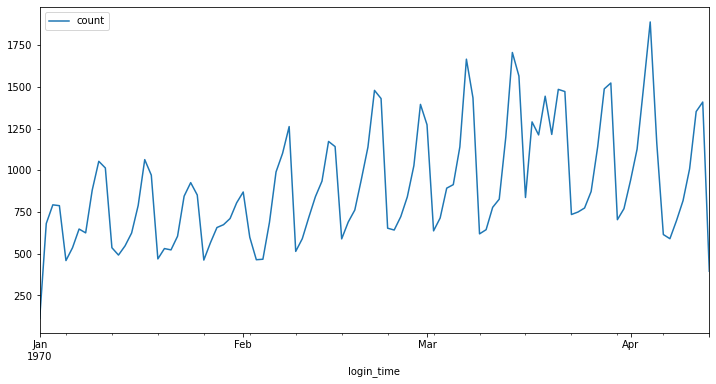

In [23]:
df_day = df.resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

Average logins stays consistent throuhg January and begins a steady incease in February. 

Text(0.5, 6.79999999999999, 'Day')

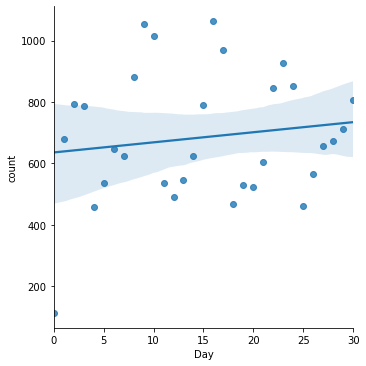

In [24]:
plot_df = df_day[df_day.index.month==1]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')

From the bootstrap confidence interval generated by seaborn, we can see that there is no clear trend either increasing or decreasing because some of the bootstrap correlation coefficients are positive and some are negative. Therefore we can conclude that the upward trend does not start in January. Let's take a look at the rest of the months.

Text(0.5, 6.79999999999999, 'Day')

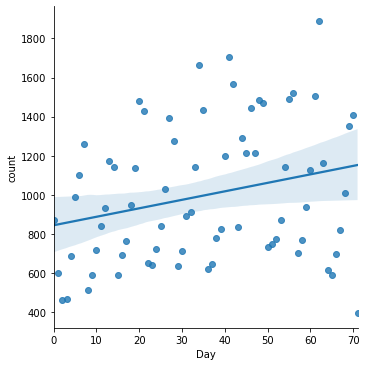

In [25]:
plot_df = df_day[df_day.index.month!=1]
plot_df = plot_df.assign(x = range(plot_df.shape[0]))
sns.lmplot(data=plot_df,x='x',y='count')
plt.xlabel('Day')

In February, March, and April there is a clear upward trend.

In [26]:
df_collection = pd.read_json('ultimate_data_challenge.json')

In [27]:
df_collection

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [28]:
df_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [28]:
df_tripcounts = df_collection['trips_in_first_30_days'].value_counts(normalize=True)*100
df_tripcounts.head(7)

0    30.780
1    28.216
2    14.804
3     7.576
4     5.124
5     3.232
6     2.268
Name: trips_in_first_30_days, dtype: float64

In [29]:
np.sum(df_tripcounts[1:])


69.22

In [29]:
df = df_collection.drop(df_collection[df_collection.phone.isna()==True].index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [30]:
df_collection

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [31]:
df['avg_rating_of_driver'].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [32]:
fill_val = (4.777861+5) / 2
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value=fill_val)

df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value=4.9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


Active users are defined as having any activity in the preceding 30 days. Though the take home challenge writeup does not indicate the current date, we can infer the latest date in the dataset as the current date for our purposes and calculate "active" users based on that date.

In [34]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [35]:
current_date = df['last_trip_date'].max()

In [36]:
df['active'] = df['last_trip_date'].apply(lambda date: 0 if (current_date-date).days>30 else 1)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Only 37.6% of users are active at the end of the six month period. Let's build a predictive model to identify the factors associated with activity. Since the dataset has low dimensionality, then we do not need to reduce it using PCA or some other technique. We will employ the Random Forest Classifier since it is powerful for prediction and will give us insight into the importance of the features.

In [37]:
df_features = pd.get_dummies(df,columns=['city','phone','ultimate_black_user'])
df_features.head()
target = df_features['active']
df_features = df_features.drop(['last_trip_date','signup_date','active'],axis=1)

<AxesSubplot:xlabel='active', ylabel='avg_dist'>

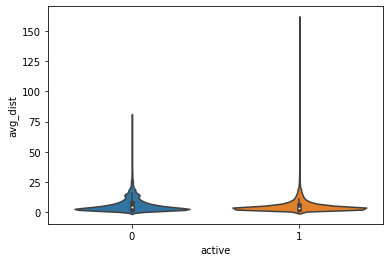

In [38]:
sns.violinplot(data=df,x='active',y='avg_dist')

In [39]:
pd.pivot_table(df,index='active',aggfunc={'avg_dist':['mean','std']})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

There is a difference in the average distance per trip taken in the first 30 days between active users and inactive users, this will be important for predictive modeling.

The average rating by by driver will probably be informative, let's plot it for active vs inactive users.

(3.5, 5.2)

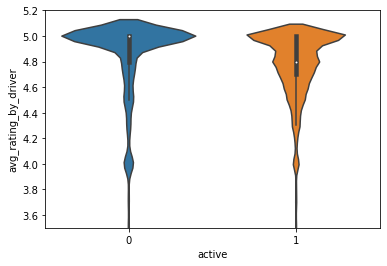

In [40]:
sns.violinplot(data=df,x='active',y='avg_rating_by_driver')
plt.ylim([3.5,5.2])

In [41]:
pd.pivot_table(df,index='active',aggfunc={'avg_rating_by_driver':['median','std']})

avg_rating_by_driver          
                     median       std
active                               
0                       5.0  0.503901
1                       4.8  0.328753

Active users have a lower rating than inactive users, perhaps because active users are more likely to have more total trips and therefore a higher chance of doing something to make the drivers give them a rating less than 5. It seems this feature will be important for predictive modeling.

In [45]:
pd.pivot_table(df,index='active',aggfunc={'trips_in_first_30_days':['mean','std']})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

Active users took more trips in their first 30 days. It is not important to verify this using hypothesis testing, because we only want to see the trend and what will be useful for our predictive model.

In [46]:
df.active.value_counts(normalize=True)*100

0    62.35989
1    37.64011
Name: active, dtype: float64

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [47]:
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2,random_state=42)

In [49]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [50]:
rf.score(X_test,y_test)

0.7491180324564056

In [51]:
print(cross_val_score(rf,X_test,np.ravel(y_test),cv=5))
print('Mean Cross Validated Score:',np.mean(cross_val_score(rf,X_test,np.ravel(y_test),cv=5)))

[0.75617128 0.74395161 0.75050403 0.74243952 0.74344758]
Mean Cross Validated Score: 0.7478069899244333


In [52]:
df_importance = pd.DataFrame(zip(list(df_features.columns),rf.feature_importances_),index=range(df_features.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
5,avg_dist,0.300857
4,weekday_pct,0.133108
6,avg_rating_by_driver,0.111051
0,trips_in_first_30_days,0.081423
1,avg_rating_of_driver,0.080886
3,surge_pct,0.079427
2,avg_surge,0.067151
8,city_King's Landing,0.047719
11,phone_iPhone,0.019809
10,phone_Android,0.019555


City, phone type, and ultimate black user stats are all relatively unimportant for the model compared to average distance driven, weekday percentage, and the rating given to the passenger by the driver.

In [53]:
precision_recall_fscore_support(y_test,y_pred)

(array([0.79961247, 0.66523605]),
 array([0.79870968, 0.6664875 ]),
 array([0.79916082, 0.66586119]),
 array([6200, 3721]))

In [54]:
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(0.7492128449651542, 0.7491180324564056, 0.7491650588343, None)

In [55]:
confusion_matrix(y_test,y_pred)

array([[4952, 1248],
       [1241, 2480]])

75% accuracy is a good start, however let us try a logistic regression model with some hyper parameter tuning, since we already have an idea of the feature importances from the random forest model.

In [56]:
logit = LogisticRegression(solver='lbfgs')
param_grid = {'C':np.arange(0.5,5.1,0.1)}
grid = GridSearchCV(logit,param_grid,cv=5)
grid.fit(X_train,np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [57]:
grid.best_estimator_.C

0.7999999999999999

In [58]:
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train,y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns),logit_coef.coef_[0]),index=range(df_features.columns.shape[0]),columns=['feature','coefficient'])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.085226
1,avg_rating_of_driver,-0.465213
2,avg_surge,2.140174
3,surge_pct,-1.076167
4,weekday_pct,-0.242469
5,avg_dist,0.161554
6,avg_rating_by_driver,-1.325845
7,city_Astapor,-0.761886
8,city_King's Landing,1.128222
9,city_Winterfell,-0.246144


In [59]:
print(np.mean(cross_val_score(grid,X_test,np.ravel(y_test),cv=5)))

0.7424654160234013


We have not gained any advantage using Logistic Regression for our classifier, the models perform almost identically.

Random Forest has given us the most important features and Logistic Regression shows us the effect of the features through the coefficients. Taking the three most important features, we can see the following effects on the "activity" of a rider after 6 months.

It may not be advisable to try to increase the distance of trips taken in the first 30 days, because the data is ambiguous. 

The chance of being an active user decrease as the percentage of week day use goes up. From this we can see that encouraging people to use the app on the weekend will be beneficial for the company revenue.

For average rating of driver, there is a decreased likelihood of being an active user as your rating goes up.

As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months.